In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

# dataset running locally 
dataset_path = r"C:\Users\Admin\Downloads\playground-series-s5e2"

# Load data
train_data = pd.read_csv(f"{dataset_path}/train.csv")
test_data = pd.read_csv(f"{dataset_path}/test.csv")
extra_data = pd.read_csv(f"{dataset_path}/training_extra.csv")

# here we are checking the shapes of all datasets
print("Train data shape : ", train_data.shape)
print("Test data shape : ", test_data.shape)
print("Extra training data shape : ", extra_data.shape)

Train data shape :  (300000, 11)
Test data shape :  (200000, 10)
Extra training data shape :  (3694318, 11)


In [4]:
# checking some sample data 
print("\nTrain data head:")
print(train_data.head())
print("\nExtra training data head:")
print(extra_data.head())
print("\nTest data head:")
print(test_data.head())


Train data head:
   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           7.0                Yes   
1   1      Jansport   Canvas   Small          10.0                Yes   
2   2  Under Armour  Leather   Small           2.0                Yes   
3   3          Nike    Nylon   Small           8.0                Yes   
4   4        Adidas   Canvas  Medium           1.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  
0         No       Tote  Black             11.611723  112.15875  
1        Yes  Messenger  Green             27.078537   68.88056  
2         No  Messenger    Red             16.643760   39.17320  
3         No  Messenger  Green             12.937220   80.60793  
4        Yes  Messenger  Green             17.749338   86.02312  

Extra training data head:
       id         Brand   Material   Size  Compartments Laptop Compartment  \
0  500000  Under Armour     Canvas  Small 

In [6]:
# Checking for the missing values in all datasets
print("\nMissing values in train data:")
print(train_data.isnull().sum())
print("\nMissing values in extra training data:")
print(extra_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in train data:
id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

Missing values in extra training data:
id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

Missing values in test data:
id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style     

In [8]:
# Comparing columns between datasets
print("\nTrain columns:", train_data.columns.tolist())
print("Extra training columns:", extra_data.columns.tolist())
print("Test columns:", test_data.columns.tolist())


Train columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']
Extra training columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']
Test columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']


In [11]:
# here we are actually combining the training data and extra data
combined_train = pd.concat([train_data, extra_data], axis = 0, ignore_index=True)

#removing the duplicates if any 
combined_train = combined_train.drop_duplicates()
print("Combined training data shape : ", combined_train.shape)

# Basic Information of the target variable (Price)
print("\nPrice information in combined dataset:")
print(combined_train['Price'].describe())

#checking all the datatypes
print("\nData types in combined dataset:")
print(combined_train.dtypes)

Combined training data shape :  (3994318, 11)

Price information in combined dataset:
count    3.994318e+06
mean     8.136217e+01
std      3.893868e+01
min      1.500000e+01
25%      4.747002e+01
50%      8.098495e+01
75%      1.148550e+02
max      1.500000e+02
Name: Price, dtype: float64

Data types in combined dataset:
id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


In [15]:
# Separate features and target
X = combined_train.drop(['Price', 'id'], axis=1)  # Remove target and ID
y = combined_train['Price']

# Handle categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Prepare test data the same way
test_features = test_data.drop('id', axis=1)
test_features = pd.get_dummies(test_features)

# Make sure train and test have same columns
X, test_features = X.align(test_features, join='left', axis=1)

# Split the combined training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [17]:
# checking the result of the analysis till now
print("Dataset Sizes:")
print(f"Original train data: {train_data.shape}")
print(f"Extra training data: {extra_data.shape}")
print(f"Combined training data: {combined_train.shape}")
print(f"Test data: {test_data.shape}")

Dataset Sizes:
Original train data: (300000, 11)
Extra training data: (3694318, 11)
Combined training data: (3994318, 11)
Test data: (200000, 10)


In [19]:
# Checking Basic statistics of the target variable (Price)
print("\nPrice Statistics:")
print(combined_train['Price'].describe())


Price Statistics:
count    3.994318e+06
mean     8.136217e+01
std      3.893868e+01
min      1.500000e+01
25%      4.747002e+01
50%      8.098495e+01
75%      1.148550e+02
max      1.500000e+02
Name: Price, dtype: float64


In [21]:
# Combined Train Feature Analysis
print("\nFeature Information:")
print(combined_train.info())


Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB
None


In [27]:
# First, let's identify numeric columns
numeric_columns = combined_train.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns in dataset:")
print(numeric_columns.tolist())

# Calculate correlations only for numeric columns
correlations = combined_train[numeric_columns].corr()['Price'].sort_values(ascending=False)
print("\nTop 10 correlations with Price:")
print(correlations[:10])

# Let's also see the data types of all columns to understand our data better
print("\nData types of all columns:")
print(combined_train.dtypes)

# For categorical columns, we can analyze their relationship with price differently
categorical_columns = combined_train.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns.tolist())

# For categorical columns, let's look at average price per category
for col in categorical_columns:
    print(f"\nAverage Price by {col}:")
    print(combined_train.groupby(col)['Price'].mean().sort_values(ascending=False).head())

Numeric columns in dataset:
['id', 'Compartments', 'Weight Capacity (kg)', 'Price']

Top 10 correlations with Price:
Price                   1.000000
Weight Capacity (kg)    0.017703
id                     -0.000670
Compartments           -0.000691
Name: Price, dtype: float64

Data types of all columns:
id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object

Categorical columns:
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

Average Price by Brand:
Brand
Under Armour    82.065208
Jansport        81.777549
Nike            81.284804
Puma            81.225577
Adidas          80.527683
Name: Price, dtype: float64

Average Price by Material:
Materi

In [30]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(combined_train, columns=categorical_columns)

# Now calculate correlations including encoded categorical variables
correlations_all = X_encoded.corr()['Price'].sort_values(ascending=False)
print("\nTop 10 correlations with Price (including encoded categorical variables):")
print(correlations_all[:10])


Top 10 correlations with Price (including encoded categorical variables):
Price                   1.000000
Weight Capacity (kg)    0.017703
Material_Polyester      0.010305
Color_Green             0.009772
Brand_Under Armour      0.009043
Color_Blue              0.007295
Material_Canvas         0.006511
Brand_Jansport          0.005126
Size_Large              0.004483
Color_Pink              0.002742
Name: Price, dtype: float64


In [34]:
#Check for categorical variables
categorical_columns = combined_train.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof',
       'Style', 'Color'],
      dtype='object')


In [38]:
#Distribution of categorical variables
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(combined_train[col].value_counts().head())


Value counts for Brand:
Brand
Under Armour    801035
Adidas          797000
Nike            764407
Puma            755778
Jansport        749340
Name: count, dtype: int64

Value counts for Material:
Material
Polyester    1060882
Leather       976186
Nylon         942656
Canvas        903632
Name: count, dtype: int64

Value counts for Size:
Size
Medium    1354487
Large     1312295
Small     1239751
Name: count, dtype: int64

Value counts for Laptop Compartment:
Laptop Compartment
Yes    1972937
No     1922848
Name: count, dtype: int64

Value counts for Waterproof:
Waterproof
Yes    1969205
No     1930789
Name: count, dtype: int64

Value counts for Style:
Style
Messenger    1329677
Tote         1297942
Backpack     1262519
Name: count, dtype: int64

Value counts for Color:
Color
Pink     688257
Gray     666110
Blue     638485
Red      630215
Black    620610
Name: count, dtype: int64


In [40]:
#  Check the dimensions after preprocessing
print("\nDimensions after preprocessing:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_val shape: {X_val_scaled.shape}")
print(f"Number of features after one-hot encoding: {X_train_scaled.shape[1]}")


Dimensions after preprocessing:
X_train shape: (3195454, 27)
X_val shape: (798864, 27)
Number of features after one-hot encoding: 27


In [42]:
#  Check for any remaining missing values
print("\nMissing values after preprocessing:")
print("In training set:", np.isnan(X_train_scaled).sum())
print("In validation set:", np.isnan(X_val_scaled).sum())


Missing values after preprocessing:
In training set: 1457
In validation set: 351


In [44]:
#  Basic statistics of scaled features
print("\nScaled features statistics (first 5 features):")
print(pd.DataFrame(X_train_scaled[:, :5]).describe())


Scaled features statistics (first 5 features):
                  0             1             2             3             4
count  3.195454e+06  3.193997e+06  3.195454e+06  3.195454e+06  3.195454e+06
mean   2.329949e-17  1.457960e-16 -1.824023e-17  1.875055e-17 -3.389886e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.533238e+00 -1.865590e+00 -4.993927e-01 -4.804794e-01 -4.864953e-01
25%   -8.418187e-01 -8.520951e-01 -4.993927e-01 -4.804794e-01 -4.864953e-01
50%   -1.503999e-01  7.373840e-03 -4.993927e-01 -4.804794e-01 -4.864953e-01
75%    8.867284e-01  8.570711e-01 -4.993927e-01 -4.804794e-01 -4.864953e-01
max    1.578147e+00  1.718732e+00  2.002432e+00  2.081255e+00  2.055518e+00


In [46]:
#  Memory usage
print("\nMemory usage:")
print(f"Training set: {X_train_scaled.nbytes / 1e6:.2f} MB")
print(f"Validation set: {X_val_scaled.nbytes / 1e6:.2f} MB")


Memory usage:
Training set: 690.22 MB
Validation set: 172.55 MB


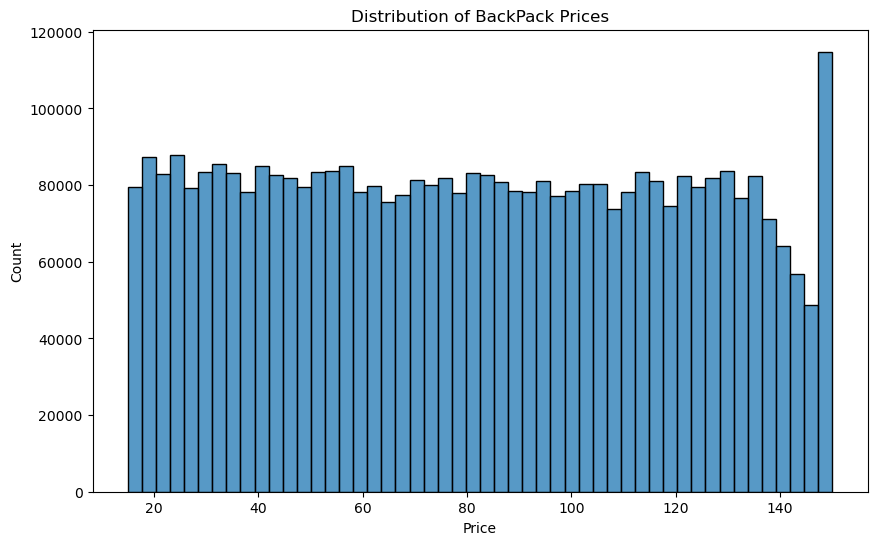

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing what we have analysed till now
# Price Distribution (Histogram)

plt.figure(figsize=(10,6))
sns.histplot(combined_train['Price'], bins=50)
plt.title('Distribution of BackPack Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

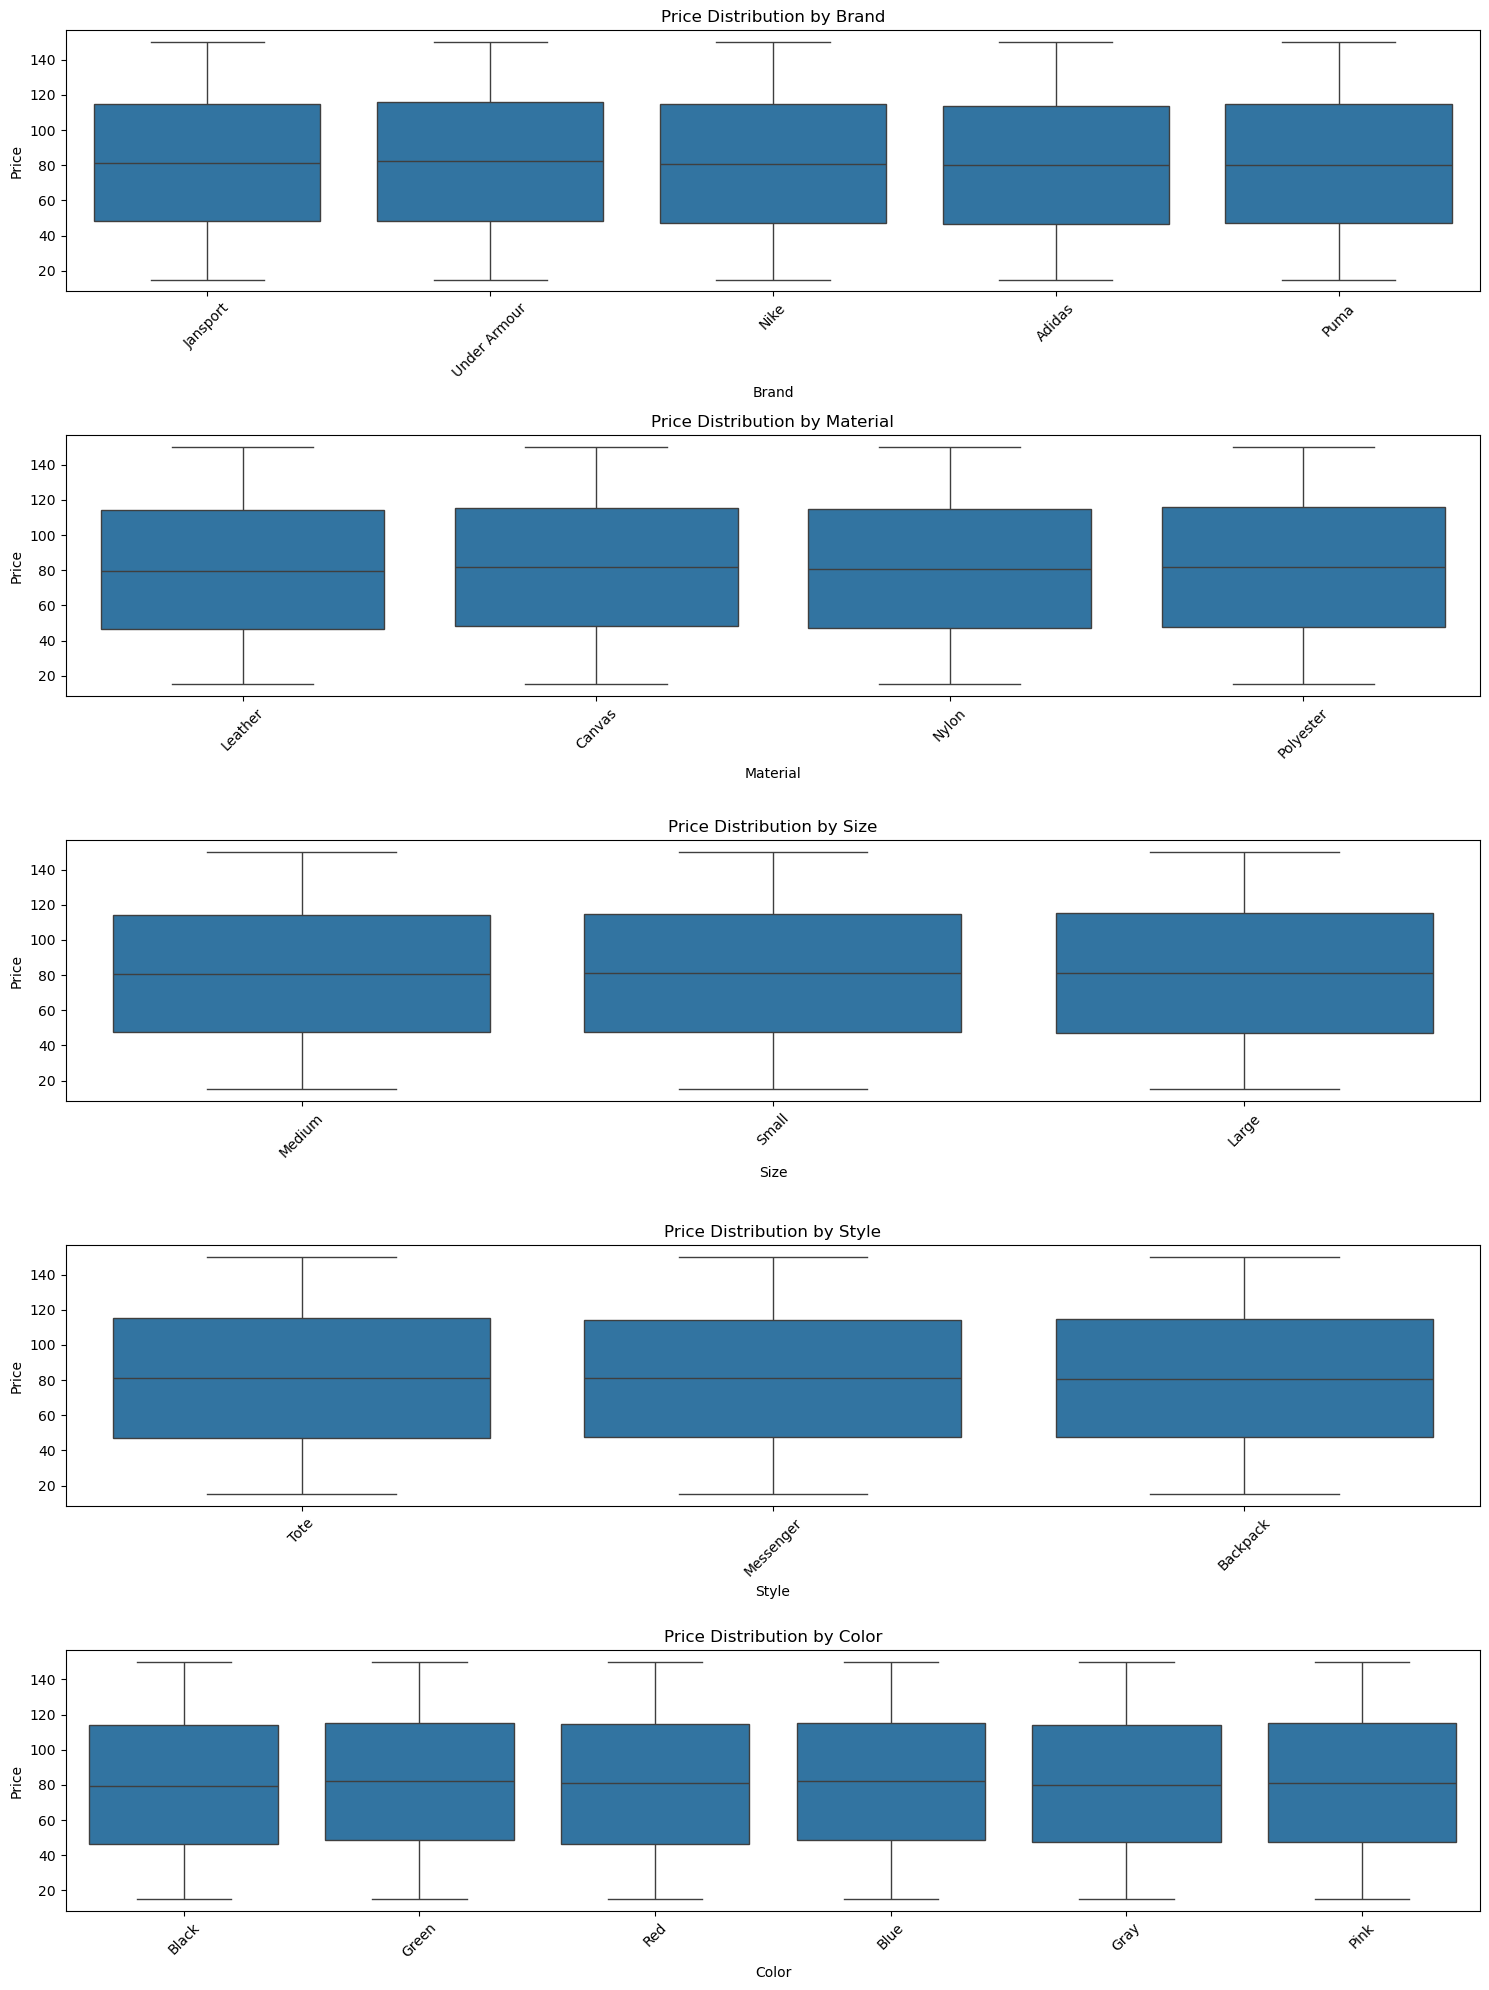

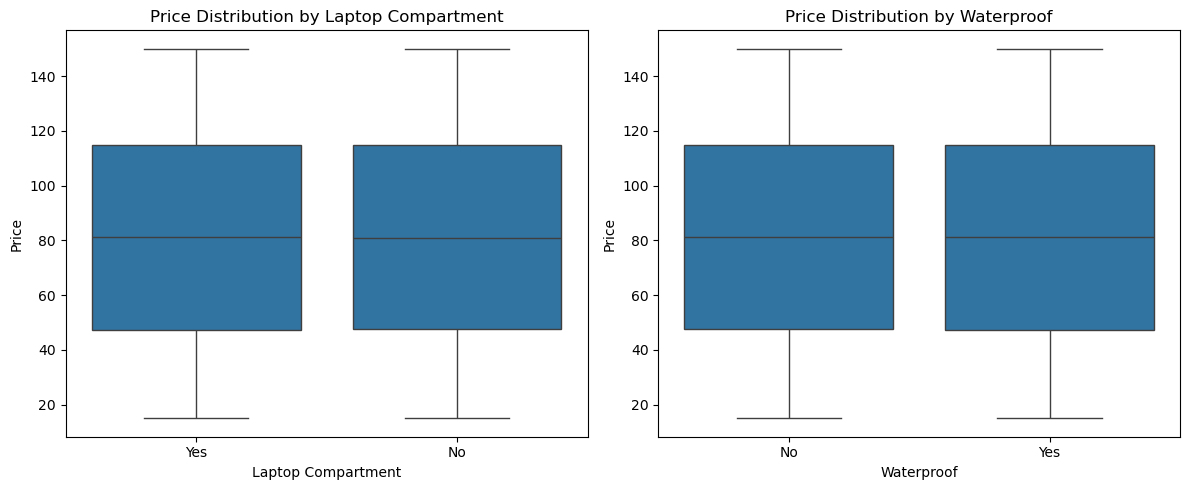


Count of items by Brand:
Brand
Under Armour    801035
Adidas          797000
Nike            764407
Puma            755778
Jansport        749340
Name: count, dtype: int64

Average price by Brand:
Brand
Under Armour    82.065208
Jansport        81.777549
Nike            81.284804
Puma            81.225577
Adidas          80.527683
Name: Price, dtype: float64

Count of items by Material:
Material
Polyester    1060882
Leather       976186
Nylon         942656
Canvas        903632
Name: count, dtype: int64

Average price by Material:
Material
Polyester    82.029424
Canvas       81.831022
Nylon        81.071794
Leather      80.488749
Name: Price, dtype: float64

Count of items by Size:
Size
Medium    1354487
Large     1312295
Small     1239751
Name: count, dtype: int64

Average price by Size:
Size
Large     81.611747
Small     81.467620
Medium    81.201377
Name: Price, dtype: float64

Count of items by Style:
Style
Messenger    1329677
Tote         1297942
Backpack     1262519
Name: count

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each categorical variable
categorical_vars = ['Brand', 'Material', 'Size', 'Style', 'Color']

plt.figure(figsize=(15, 20))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 1, i)
    sns.boxplot(data=combined_train, x=var, y='Price')
    plt.xticks(rotation=45)
    plt.title(f'Price Distribution by {var}')
    plt.tight_layout()
plt.show()

# For binary categorical variables (Laptop Compartment, Waterproof)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=combined_train, x='Laptop Compartment', y='Price')
plt.title('Price Distribution by Laptop Compartment')

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_train, x='Waterproof', y='Price')
plt.title('Price Distribution by Waterproof')

plt.tight_layout()
plt.show()

# Additional analysis: Count of items in each category
for var in categorical_vars:
    print(f"\nCount of items by {var}:")
    print(combined_train[var].value_counts().head())
    print(f"\nAverage price by {var}:")
    print(combined_train.groupby(var)['Price'].mean().sort_values(ascending=False).head())

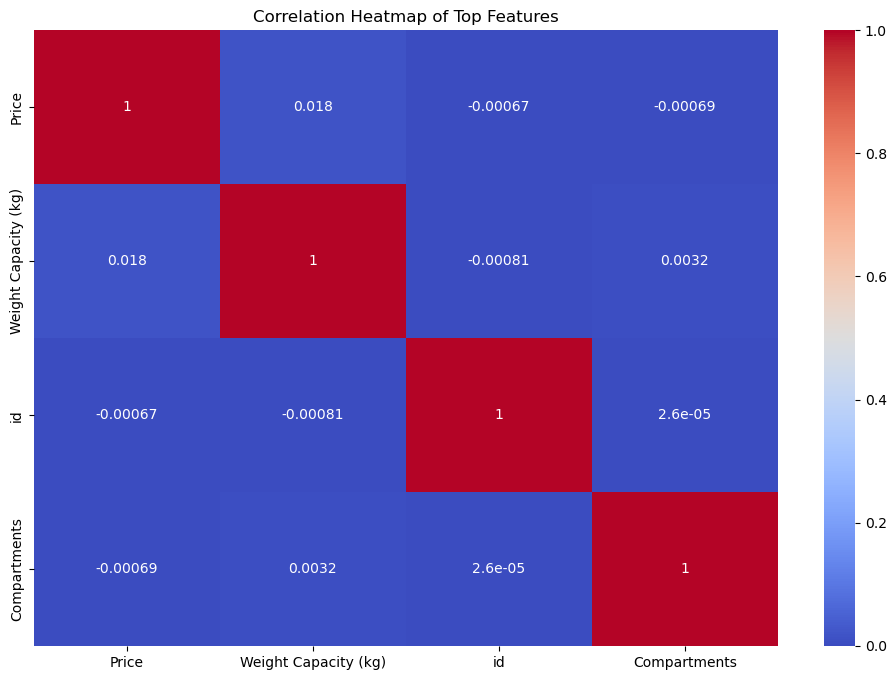

In [65]:
#now making the correlation heatmap
# 3. Correlation Heatmap (top 10 features)
plt.figure(figsize=(12, 8))
top_corr_features = correlations[:10].index
correlation_matrix = combined_train[top_corr_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

Finding best parameters...
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best RMSE: 0.3122475971708739

Best Decision Tree Performance Metrics:
Train RMSE: 0.1904
Validation RMSE: 0.3636
Train MAE: 0.1414
Validation MAE: 0.3003
Train R2: 0.5893
Validation R2: -0.7291
Train Explained Variance: 0.5893
Validation Explained Variance: -0.4229
Training Time (seconds): 0.0000


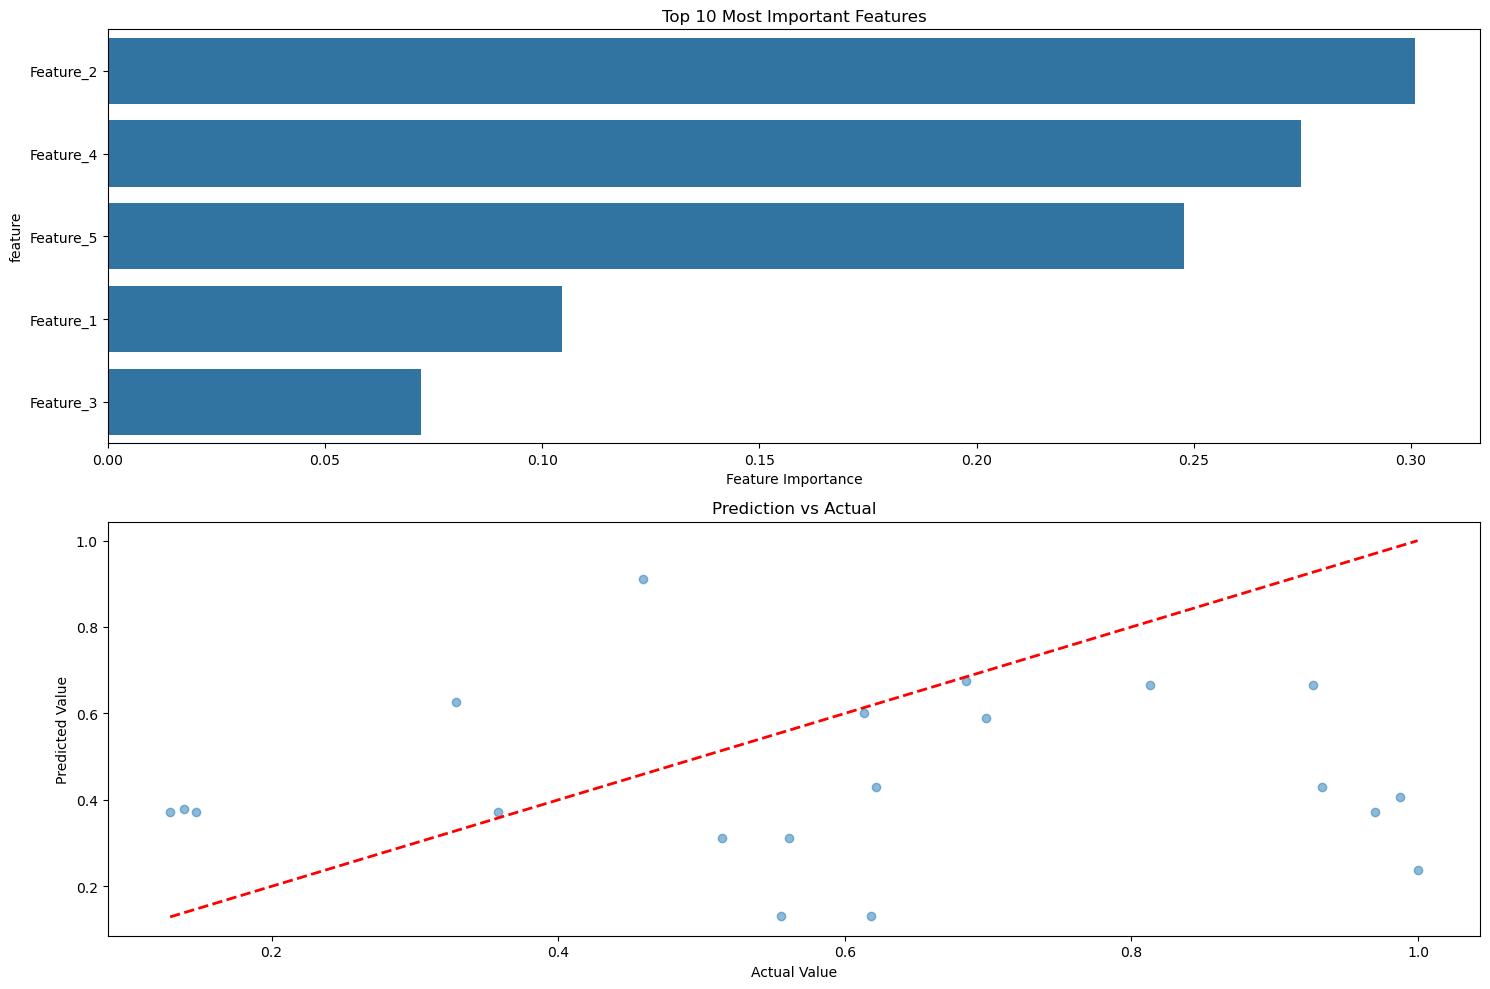

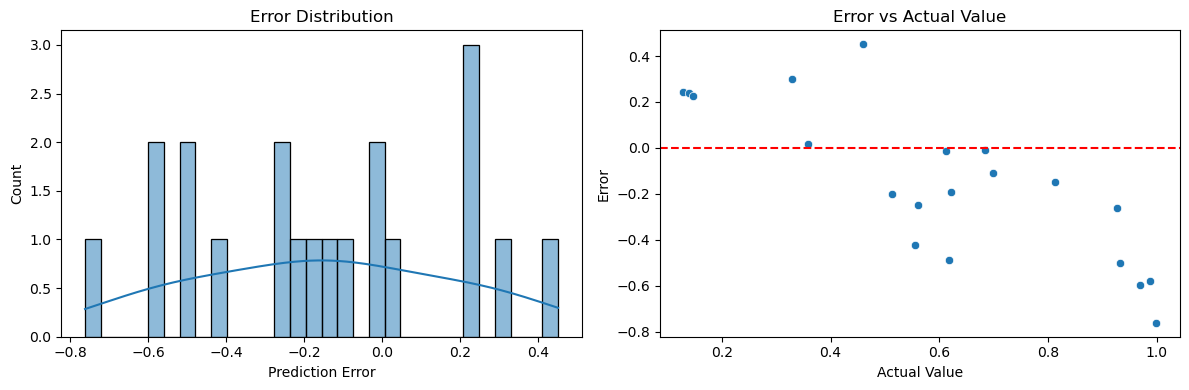


Final Model Summary Report
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation RMSE: 0.3122
Validation RMSE: 0.3636
Validation R2 Score: -0.7291

Top 5 Most Important Features:
     feature  importance
1  Feature_2    0.300822
3  Feature_4    0.274687
4  Feature_5    0.247740
0  Feature_1    0.104667
2  Feature_3    0.072083

Performance by Value Range:
                    RMSE          R2
Value_Range                         
(0.128, 0.352]  0.253096   -8.368777
(0.352, 0.559]  0.325613  -18.411242
(0.559, 0.647]  0.289617 -134.878731
(0.647, 0.928]  0.159207   -1.644235
(0.928, 1.0]    0.617865 -598.407076


C:\Users\Admin\AppData\Local\Temp\ipykernel_3476\2531073045.py:155: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  range_metrics = range_performance.groupby('Value_Range', observed=False).apply(


In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

def evaluate_detailed_model(model, X_train, X_val, y_train, y_val, model_name):
    """
    Enhanced evaluation function with comprehensive metrics and analysis
    """
    # Time the training
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate detailed metrics
    metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'Validation RMSE': np.sqrt(mean_squared_error(y_val, val_pred)),
        'Train MAE': mean_absolute_error(y_train, train_pred),
        'Validation MAE': mean_absolute_error(y_val, val_pred),
        'Train R2': r2_score(y_train, train_pred),
        'Validation R2': r2_score(y_val, val_pred),
        'Train Explained Variance': explained_variance_score(y_train, train_pred),
        'Validation Explained Variance': explained_variance_score(y_val, val_pred),
        'Training Time (seconds)': training_time
    }
    
    print(f"\n{model_name} Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return model, metrics

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Ensure X_train_scaled and y_train are defined before fitting
try:
    print("Finding best parameters...")
    dt_grid.fit(X_train_scaled, y_train)
except NameError:
    raise ValueError("X_train_scaled and/or y_train are not defined. Please check your data.")

# Ensure GridSearchCV has found best parameters
if not hasattr(dt_grid, "best_params_"):
    raise ValueError("GridSearchCV has not been fitted successfully. Check for errors above.")

print("\nBest parameters:", dt_grid.best_params_)
print("Best RMSE:", -dt_grid.best_score_)

# Train final Decision Tree model using best parameters
best_dt = DecisionTreeRegressor(**dt_grid.best_params_, random_state=42)

# Train and evaluate the model
final_model, metrics = evaluate_detailed_model(
    best_dt, X_train_scaled, X_val_scaled, y_train, y_val, 
    "Best Decision Tree"
)

# Handling feature names correctly
if isinstance(X_train_scaled, pd.DataFrame):
    feature_names = X_train_scaled.columns  # If it's a DataFrame, use column names
else:
    feature_names = [f'Feature_{i+1}' for i in range(X_train_scaled.shape[1])]  # Generic names for NumPy arrays

# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': final_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Feature Importance
plt.subplot(2, 1, 1)
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')

# 2. Prediction vs Actual
plt.subplot(2, 1, 2)
val_pred = final_model.predict(X_val_scaled)
plt.scatter(y_val, val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual')

plt.tight_layout()
plt.show()

# Error Analysis
errors = val_pred - y_val

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(errors, bins=30, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val, y=errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Error vs Actual Value')
plt.xlabel('Actual Value')
plt.ylabel('Error')

plt.tight_layout()
plt.show()

# Print final detailed report
print("\nFinal Model Summary Report")
print("=" * 50)
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best Cross-validation RMSE: {-dt_grid.best_score_:.4f}")
print(f"Validation RMSE: {metrics['Validation RMSE']:.4f}")
print(f"Validation R2 Score: {metrics['Validation R2']:.4f}")
print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string())

# Performance analysis across different value ranges
value_ranges = pd.qcut(y_val, q=5)
range_performance = pd.DataFrame({
    'Actual': y_val,
    'Predicted': val_pred,
    'Value_Range': value_ranges
})

print("\nPerformance by Value Range:")
range_metrics = range_performance.groupby('Value_Range', observed=False).apply(
    lambda x: pd.Series({
        'RMSE': np.sqrt(mean_squared_error(x['Actual'], x['Predicted'])),
        'R2': r2_score(x['Actual'], x['Predicted'])
    })
).drop(columns=['Value_Range'], errors='ignore')  # Ensure 'Value_Range' column is removed

print(range_metrics)


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import math

# Load data
dataset_path = r"C:\Users\Admin\Downloads\playground-series-s5e2"
train_data = pd.read_csv(f"{dataset_path}/train.csv")
test_data = pd.read_csv(f"{dataset_path}/test.csv")
extra_data = pd.read_csv(f"{dataset_path}/training_extra.csv")

# Store test IDs separately before any processing
test_ids = test_data['id'].copy()

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Extra training data shape:", extra_data.shape)

def prepare_data(data, label_encoders=None, is_test=False):
    """
    Prepare data for modeling by handling categorical variables
    and separating features and target
    """
    # Make a copy to avoid modifying original data
    data = data.copy()
    
    # If ID column exists, drop it
    id_col = 'id' if 'id' in data.columns else None
    if id_col:
        X = data.drop([id_col], axis=1)
    else:
        X = data.copy()
    
    # Handle categorical variables
    if label_encoders is None:
        # Training mode - create new label encoders
        label_encoders = {}
        for column in X.columns:
            if X[column].dtype == 'object':
                le = LabelEncoder()
                X[column] = le.fit_transform(X[column].astype(str))
                label_encoders[column] = le
    else:
        # Test mode - use existing label encoders
        for column, le in label_encoders.items():
            if column in X.columns:
                # Handle unseen categories by using a default value
                X[column] = X[column].astype(str)
                X[column] = X[column].map(lambda x: x if x in le.classes_ else le.classes_[0])
                X[column] = le.transform(X[column])
    
    if is_test:
        return X, label_encoders
    else:
        # Find the target column (assuming it's the last column in training data)
        target_col = X.columns[-1]
        y = X[target_col]
        X = X.drop([target_col], axis=1)
        return X, y, label_encoders

# Prepare training data and get label encoders
X_train, y_train, label_encoders = prepare_data(train_data)

# Prepare test data using the same label encoders
X_test, _ = prepare_data(test_data, label_encoders=label_encoders, is_test=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to maintain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize and train GridSearchCV
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
dt_grid.fit(X_train_scaled, y_train)

print("\nBest parameters:", dt_grid.best_params_)
print("Best RMSE:", -dt_grid.best_score_)

# Train final model with best parameters
best_dt = DecisionTreeRegressor(**dt_grid.best_params_, random_state=42)
best_dt.fit(X_train_scaled, y_train)

# Create predictions for test set
test_predictions = best_dt.predict(X_test_scaled)

# Create submission DataFrame using original test IDs
submission_df = pd.DataFrame({
    'id': test_ids,
    'target': test_predictions
})

# Verify that IDs match the original test file
print("\nVerifying submission IDs:")
print("Original test IDs shape:", len(test_ids))
print("Submission IDs shape:", len(submission_df))
print("First few IDs in test file:", test_ids.head().tolist())
print("First few IDs in submission:", submission_df['id'].head().tolist())

# Save submission file
submission_filename = 'decision_tree_submission.csv'
submission_df.to_csv(submission_filename, index=False)

print(f"\nSubmission file created: {submission_filename}")
print(f"Shape of submission file: {submission_df.shape}")
print("\nFirst few rows of submission file:")
print(submission_df.head())

# Additional validation checks
print("\nSubmission Validation:")
print(f"Number of predictions: {len(submission_df)}")
print(f"Any missing values: {submission_df.isnull().any().any()}")
print(f"Prediction value range: [{submission_df['target'].min():.2f}, {submission_df['target'].max():.2f}]")
print(f"ID range: [{submission_df['id'].min()}, {submission_df['id'].max()}]")

Train data shape: (300000, 11)
Test data shape: (200000, 10)
Extra training data shape: (3694318, 11)
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best RMSE: 39.019327500671565

Verifying submission IDs:
Original test IDs shape: 200000
Submission IDs shape: 200000
First few IDs in test file: [300000, 300001, 300002, 300003, 300004]
First few IDs in submission: [300000, 300001, 300002, 300003, 300004]

Submission file created: decision_tree_submission.csv
Shape of submission file: (200000, 2)

First few rows of submission file:
       id     target
0  300000  81.352623
1  300001  81.826038
2  300002  81.826038
3  300003  81.352623
4  300004  80.251509

Submission Validation:
Number of predictions: 200000
Any missing values: False
Prediction value range: [23.41, 100.78]
ID range: [300000, 499999]
